In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/RCNN_Skin_Disease/rcnn_skin.zip
# !pip uninstall opencv-contrib-python opencv-python

Archive:  /content/drive/MyDrive/RCNN_Skin_Disease/rcnn_skin.zip
   creating: DataSetCSV/
 extracting: DataSetCSV/ISIC_0000000.csv  
 extracting: DataSetCSV/ISIC_0000001.csv  
 extracting: DataSetCSV/ISIC_0000002.csv  
 extracting: DataSetCSV/ISIC_0000003.csv  
 extracting: DataSetCSV/ISIC_0000004.csv  
 extracting: DataSetCSV/ISIC_0000006.csv  
 extracting: DataSetCSV/ISIC_0000007.csv  
 extracting: DataSetCSV/ISIC_0000008.csv  
 extracting: DataSetCSV/ISIC_0000009.csv  
 extracting: DataSetCSV/ISIC_0000010.csv  
 extracting: DataSetCSV/ISIC_0000011.csv  
 extracting: DataSetCSV/ISIC_0000012.csv  
 extracting: DataSetCSV/ISIC_0000013.csv  
 extracting: DataSetCSV/ISIC_0000014.csv  
 extracting: DataSetCSV/ISIC_0000015.csv  
 extracting: DataSetCSV/ISIC_0000016.csv  
 extracting: DataSetCSV/ISIC_0000017.csv  
 extracting: DataSetCSV/ISIC_0000018.csv  
 extracting: DataSetCSV/ISIC_0000019.csv  
 extracting: DataSetCSV/ISIC_0000020.csv  
 extracting: DataSetCSV/ISIC_0000021.csv  
 extrac

In [ ]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
path = "OriginalImage"
annot = "DataSetCSV"

ISIC_0000142.jpg
   Unnamed: 0   0   1    2    3
0           0  52  34  134  168
52 34 134 168


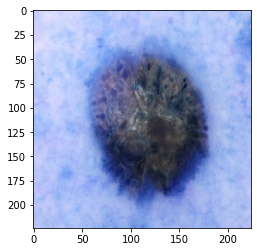

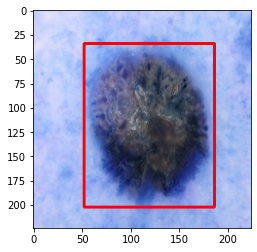

In [ ]:
#just for verification 
for e,i in enumerate(os.listdir(annot)):
    if e < 1:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        print(df.head())
        plt.imshow(img)
        for row in df.iterrows():
            _,x,y,w,h=row[1].tolist()
        print(x,y,w,h)
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [ ]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
# !pip uninstall opencv-contrib-python opencv-python
# !pip install opencv-contrib-python

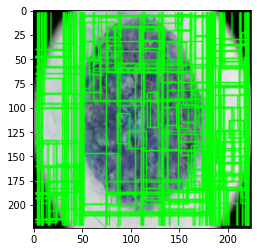

In [ ]:
im = cv2.imread(os.path.join(path,"ISIC_0000101.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [ ]:
train_images=[]
train_labels=[]

In [ ]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
for e,i in enumerate(os.listdir(annot)):
    if(e==230):
      break
    try:
        filename = i.split(".")[0]+".jpg"
        print(e,filename)
        image = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        gtvalues=[]
        for row in df.iterrows():
          _,a,b,c,d=row[1].tolist()
        x1=a
        y1=b
        x2=a+c
        y2=b+d
        gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})  


        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = image.copy()
        counter = 0
        falsecounter = 0
        flag = 0
        fflag = 0
        bflag = 0
        for e,result in enumerate(ssresults):
            if e < 2000 and flag == 0:
                for gtval in gtvalues:
                    x,y,w,h = result
                    iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                    if counter < 30:
                        if iou > 0.70:
                            print("Yes got here")
                            timage = imout[y:y+h,x:x+w]
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                            train_images.append(resized)
                            train_labels.append(1)
                            counter += 1
                    else :
                        fflag =1
                    if falsecounter <30:
                        if iou < 0.3:
                            timage = imout[y:y+h,x:x+w]
                            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                            train_images.append(resized)
                            train_labels.append(0)
                            falsecounter += 1
                    else :
                        bflag = 1
                if fflag == 1 and bflag == 1:
                    print("inside")
                    flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 ISIC_0000142.jpg
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
1 ISIC_0000300.jpg
Yes got here
Yes got here
Yes got here
2 ISIC_0000208.jpg
Yes got here
Yes got here
3 ISIC_0000395.jpg
Yes got here
4 ISIC_0000306.jpg
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
5 ISIC_0000089.jpg
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
6 ISIC_0000163.jpg
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
Yes got here
7 ISIC_0000032.jpg
Yes got here
Yes got here
Yes got here
Yes got here
8 ISIC_0000370.jpg
Yes got here
Yes got here
Yes got here
Yes got here
9 ISIC_0000413.jpg
10 ISIC_0000451.jpg
Yes got here
Yes got here
11 ISIC_0000135.jpg
Yes got here
Yes got here
Yes got here
Yes

In [ ]:
X_new = np.array(train_images)
y_new = np.array(train_labels)
from sklearn.utils import shuffle
X_new,y_new = shuffle(X_new, y_new, random_state=24)

(8914, 224, 224, 3)
(8914,)
6658 2256
1


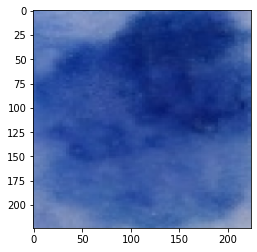

In [ ]:
print(X_new.shape)
one=0
zero=0
a=X_new.shape
print(y_new.shape)
for i in range(a[0]):
  if(y_new[i]==1):
    # print(i)
    one=one+1
  else:
    zero=zero+1
print(zero,one)
print(y_new[8905])
plt.imshow(X_new[8905])

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [ ]:

# vggmodel = VGG16(weights='imagenet', include_top=True)
# vggmodel.summary()
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# for layers in (vggmodel.layers)[:15]:
#     # print(layers)
#     layers.trainable = False

for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# X= vggmodel.layers[-2].output
from keras.layers import Input, Lambda, Dense, Flatten
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model_final = Model(inputs=vgg.input, outputs=prediction)
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# predictions = Dense(2, activation="softmax")(X)

In [ ]:
# model_final = Model(vggmodel.input,predictions)

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [ ]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
# from keras import optimizers


# adam = optimizers.Adam()
# model_final.compile(loss='binary_crossentropy',
#               optimizer=adam,
#               metrics=['accuracy'])

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)
print(Y)

[[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.15)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7576, 224, 224, 3) (1338, 224, 224, 3) (7576, 2) (1338, 2)


In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("new_rcnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 5, epochs= 20, validation_data= testdata, validation_steps=32, callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
5/5 [==============================] - 62s 3s/step - loss: 2.1282 - accuracy: 0.6069 - val_loss: 0.9331 - val_accuracy: 0.8164

Epoch 00001: val_loss improved from inf to 0.93314, saving model to new_rcnn_vgg16_1.h5
Epoch 2/20
5/5 [==============================] - 12s 3s/step - loss: 1.1480 - accuracy: 0.8693 - val_loss: 0.5286 - val_accuracy: 0.8984

Epoch 00002: val_loss improved from 0.93314 to 0.52857, saving model to new_rcnn_vgg16_1.h5
Epoch 3/20
5/5 [==============================] - 12s 3s/step - loss: 0.9555 - accuracy: 0.8530 - val_loss: 0.3949 - val_accuracy: 0.9277

Epoch 00003: val_loss improved from 0.52857 to 0.39491, saving model to new_rcnn_vgg16_1.h5
Epoch 4/20
5/5 [==============================] - 12s 3s/step - loss: 0.5812 - accuracy: 0.8920 - val_loss: 0.3983 - val_accuracy: 0.9346

Epoch 00004: val_loss did not improve from 0.39491
Epoch 5/20
5/5 [==============================] - 12s 3s/step - loss: 0.2051 - accuracy: 0.9642 - val_loss: 0.3793 - val_

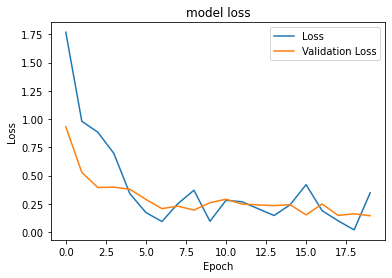

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.savefig('chart_loss.png')
plt.show()

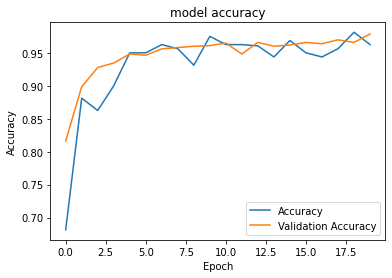

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.savefig('chart_accuracy.png')
plt.show()

[[0.54072887 0.4592711 ]]
skin disease


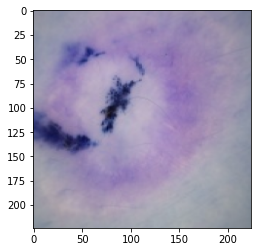

In [ ]:
im = X_test[4]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
print(out)
if out[0][0] > out[0][1]:
    print("skin disease")
else:
    print("not a skin disease")


not a skin disease


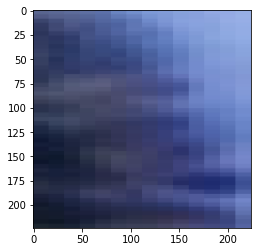

In [ ]:
im = X_test[12]

plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("skin disease")
else:
    print("not a skin disease")


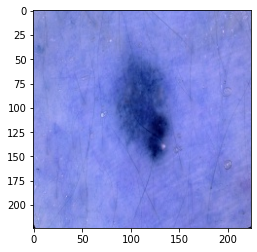

In [ ]:
# import keras
# import cv2
# from keras.models import load_model
# cv2.setUseOptimized(True);
# ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
# import matplotlib.pyplot as plt

# model =load_model('ieeercnn_vgg16_1.h5')
# print("imported successffully")
test_path="/content/drive/MyDrive/RCNN_Skin_Disease/test.jpg"
img = cv2.imread(test_path)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    # print(e)
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.65:
          cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 0, 255), 10, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

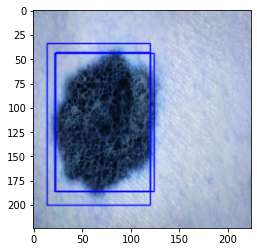

In [ ]:
test_path="/content/drive/MyDrive/RCNN_Skin_Disease/onlineImageTest.jpg"
img = cv2.imread(test_path)
img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.80:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

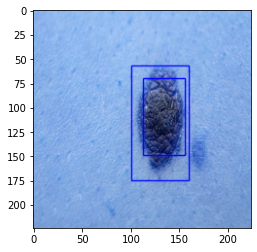

In [ ]:
test_path="/content/drive/MyDrive/RCNN_Skin_Disease/2.jpg"
img = cv2.imread(test_path)
img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.80:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

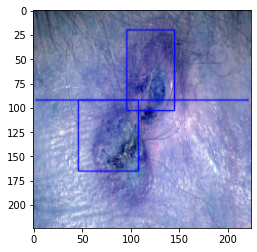

In [ ]:
test_path="/content/drive/MyDrive/RCNN_Skin_Disease/3.jpg"
img = cv2.imread(test_path)
img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.80:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

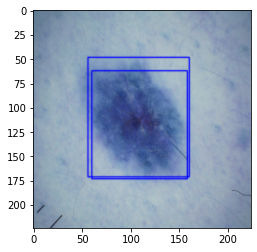

In [ ]:
test_path="/content/drive/MyDrive/RCNN_Skin_Disease/4.jpg"
img = cv2.imread(test_path)
img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.80:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

In [ ]:

#webcam feed through ip cam - mobile 
#its a bit slow due to high computation
import numpy as np
import cv2
import urllib.request
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
# for webcams, request stream only once.
path="http://192.168.29.98:8080/shot.jpg"
while(True):
    imgResp = urllib.request.urlopen(path)
    imgNp = np.array(bytearray(imgResp.read()), dtype=np.uint8)
    imgOriginal = cv2.imdecode(imgNp, -1)
    img = np.asarray(imgOriginal)
    img=cv2.resize(img,(224,224))
    img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    ssresults = ss.process()
    imout = img.copy()
    for e,result in enumerate(ssresults):
        if e < 100:
            x,y,w,h = result
            timage = imout[y:y+h,x:x+w]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            img = np.expand_dims(resized, axis=0)
            out= model_final.predict(img)
            if out[0][0] > 0.80:
                cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA)
    cv2.imshow("frame",imout)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Done. release the capture
cap.release()
cv2.destroyAllWindows()